# Analysis of trajectories


Here we analyse random trajectory. As an input we take the data in dataframe format:
dataframe(x(t), y(t)). Here we focus on two-dimensional trajectory, although analysis can be done for N-dimensional space.


### Main questions about trajectories
Each trajectory seems random and it is hard to compare one X_1(t) to another X_2(t). 
Primarily we are interested in properties of spatial and temporal properties of X_i(t): 
1. distribution of duration of stops of human trajectories p(t)
2. distribution of length of jumps between two stops q(r)

These properties (distributions p(t) and q(r)) can help us to see if different people have different patterns in their trajectories X_i(t) of distributions of duration of stops and lengths of stops.

Text(0.5, 0.98, 'Distribution of steps for RW mu=0.5 sigma= 20')

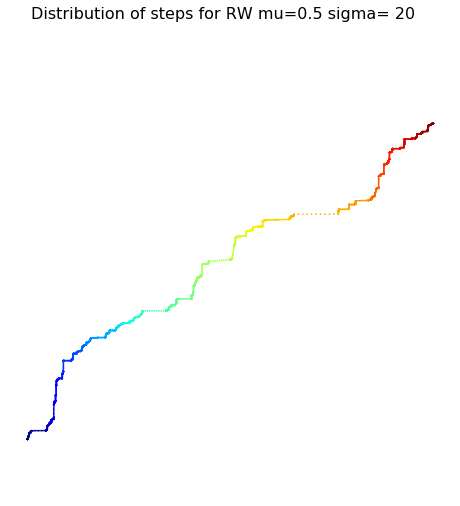

In [4]:
'''
We generate random trajectory of continuous time random walk (CTRW) in N-dimensional space. We take N=2, easier to visualize.
Alternatively we can also create or load dataframe with trajectories.

moves_dataframe = pd.DataFrame(data={
        'date': moves_processed_data['date'],
        'steps': moves_processed_data['steps'],
        'distance': moves_processed_data['distance'],
        'latitude': moves_processed_data['lat'],
        'longitude': moves_processed_data['lon']
})
#Plot distribution of moves from new dataframe.
#Compare moves from 1st trajectory and 2nd trajectory
sns.distplot(df1['distance'])
'''


import matplotlib.image as mpimg
import numpy as np
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt


'''
Parameters of RW setting

'''
n= 1000 #length of random walk
mu = 0.5 #normal distribution
sigma =20
beta = 5 #exponential parameters
a = 1 # pareto distribution
weib = 1 #weibul parameter

'''
Simple RW motion with random steps
'''

x = np.cumsum(np.random.randn(n))
y = np.cumsum(np.random.randn(n)) 

'''
Now we introduce some CTRW motion in between the steps driven from 
 Weibul distribution 
 Pareto distribution 
 Random normal distribution
'''

x =  np.cumsum(np.random.exponential(1./beta, n))
y =  np.cumsum(np.random.exponential(1./beta, n))

x_w = np.cumsum(np.random.weibull(weib, n))
y_w = np.cumsum(np.random.weibull(weib, n))

x =  np.cumsum(np.random.pareto(a, n))
y =  np.cumsum(np.random.pareto(a, n))

x_n =  np.cumsum(np.random.normal(mu, sigma, n))
y_n =  np.cumsum(np.random.normal(mu, sigma, n))


# We add 10 intermediary points between two
# successive points. We interpolate x and y.


'''
Now the trajectory is recorded in two arrays x2, y2
'''
k = 10
X_tr = np.interp(np.arange(n * k), np.arange(n) * k, x)
Y_tr = np.interp(np.arange(n * k), np.arange(n) * k, y)
#print('x2 rw', x2)

'''
plotting one RW
'''

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_tr, Y_tr, c=range(n * k), linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet,) # We draw our points with a gradient of colors.
ax.axis('equal')
ax.set_axis_off()

#fig.suptitle('Distribution of steps for RW a='+str(a), fontsize=16)
fig.suptitle('Distribution of steps for RW mu='+str(mu)+' sigma= '+str(sigma), fontsize=16)
#plt.savefig('RW_motion_steps_normal_mu'+str(mu)+'sigma'+str(mu)+'.png')


#  Analysis of trajectories
Now we are ready to analyze our trajectory, encoded in two arrays (X_tr(t),Y_tr(t)). 
You can load your data in these files X_tr(t), Y_tr(t). 
We first do standard Continuous time rando walk analysis, then we come to more advanced analysis.


### Continuous time random walk. Definition and ideas.

*Continuous time random walk* (CTRW) is a generalization of a random walk where the wandering particle waits for a random time between jumps. 
It is a stochastic jump process with arbitrary distributions of jump lengths and waiting times.
More generally it can be seen to be a special case of a Markov renewal process. 

Important properties of CTRW are r(t) and d(t) distributions of lengths of jumps and durations correspondingly. 

For more details look at code and papers here 
https://github.com/Liyubov/networks_random_walking

### Analysis 

We use here several methods of analysis of trajectories using CTRW framework. 

1. Standard deviation. 
Given the input trajectory r(t) =(x(t),y(t)), we first estimate standard deviation for trajectory (STD), which is just the root of variance so var(τ)=(Var(r(t)-r(t-τ))), calculating it in Euclidean space.


2. 
One can also estimate Hurst exponent, which is used as a measure of long-term memory of time series
https://en.wikipedia.org/wiki/Hurst_exponent#Estimating_the_exponent.
Hurst exponent relates to the autocorrelations of the time series, and the rate at which these decrease as the lag between pairs of values increases. 
For any trajectory we can write Var(τ) ∝ τ^(2H), where H is the Hurst exponent.
Hence (Var(z(t)-z(t-τ))) ∝ τ^(2H). 
Then 
[log (Var(z(t)-z(t-τ))) / log τ ] / 2 ∝ H (gives the Hurst exponent) where we know the term in square brackets on far left is the slope of a log-log plot of tau and a corresponding set of variances.
*Range of Hurst exponent.*
A value H in the range 0.5–1 indicates a time series with long-term positive autocorrelation, meaning both that a high value in the series will probably be followed by another high value and that the values a long time into the future will also tend to be high. A value in the range 0 – 0.5 indicates a time series with long-term switching between high and low values in adjacent pairs, meaning that a single high value will probably be followed by a low value and that the value after that will tend to be high, with this tendency to switch between high and low values lasting a long time into the future. A value of H=0.5 can indicate a completely uncorrelated series.

Basically, the idea of Hurst exponent is to characterize trajectory in terms of self-repetition. If Hurst exponent is between [0,0.5], then it indicates that trajectory has switches between different regimes. 
While if Hurst exponent  [0.5, 1], then it means that there are less switches between long and short jumps and trajectory has long-term positive autocorrelation. If Hurst exponent is 0.5, then it indicates completely uncorrelated series (although it depends on scales). 




In [5]:

'''
We adapt the function to estimate:
1.  STD of trajectories;
2.  Hurst exponent for trajectories.

First we estimate STD 
Then we estimate Hurst exponent. 
'''


print("Calculating STD of trajectory ")  
data1 = list(zip(X_tr, Y_tr))#zip together x and y coordinates
#data1 = np.asarray(latlon1) # if imported from dataframe
print("std of trajectory : ", np.std(data1)) 


lags = range(2,100)
def hurst_exponen_chan(p):
    '''
    given series p(t), where t is time 
    '''    
    variancetau = []; tau = []

    for lag in lags: 

        #  Write the different lags into a vector to compute a set of tau or lags
        tau.append(lag)

        # Compute the log returns on all days, then compute the variance on the difference in log returns
        # call this pp or the price difference
        pp = np.subtract(p[lag:], p[:-lag])
        variancetau.append(np.var(pp))

    # we now have a set of tau or lags and a corresponding set of variances.
    #print tau
    #print variancetau

    # plot the log of those variance against the log of tau and get the slope
    m = np.polyfit(np.log10(tau),np.log10(variancetau),1)

    hurst = m[0] / 2

    return hurst

print('hurtst exponent')
print(hurst_exponen_chan(data1))


Calculating STD of trajectory 
std of trajectory :  2011.43593611
hurtst exponent
0.623177177402


### Estimation of scaling exponent of trajectory 

Given trajectory displacements r(t) = t^(-b-1),  we estimate b constant from the trajectory. 
Then  we fit this distribution of travelling distances to a power law. 

If parameter b<2, then this indicates that trajectories are reminiscent of scale-free random walks known as Le´vy flights. If parameter b>2, this indicates that trajectory generating process is related to normal spreading.

For this we are using Python package for  analysis of diffusion data
https://diffusion-analysis-md-simulations.readthedocs.io/en/latest/diffusion_analysis.html

    *diffusion_analysis.fit_anomalous_diffusion_data(time_data_array, MSD_data_array, degrees_of_freedom=2)*
    
function should fit anomalous diffusion data to Equation 1 in [Kneller2011], and return appropriate diffusion parameters:    MSD=ND_αt^α.


In [ ]:
'''
We adapt the function to estimate:
1.  STD of trajectories;
2.  beta exponent 
'''

import numpy as np 
#to prepare for diffusion analysis, load my github-hosted diffusion module:
import sys; sys.path.append('/sansom/sc2/bioc1009/github_projects/diffusion_utility/diffusion_analysis_MD_simulations')
#import diffusion_analysis


print("Calculating beta constant of first trajectory ")  

#load trajectory in 2D 
data1 = np.asarray(latlon1)
print("std of trajectory : ", np.std(data1)) 

#diffusion_analysis.fit_anomalous_diffusion_data(time_data_array, MSD_data_array)


## Convex hull analysis of trajectories 

Given trajectory in 2D (in general in N dimensions) we can characterize some of its properties by the applying convex hull algorithms. 

### Example

Given random trajectory in N-dimensions 
<img src="convex.png" alt="Drawing" style="width: 200px;"/>
we draw the polygon around it, and estimate its volume, which allows us to characterize the trajectory qualitatively .


General information about convex hull
https://en.wikipedia.org/wiki/Convex_hull

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
#from RDP import rdp #import rdp
import networkx as nx
from scipy.spatial import ConvexHull


N = 10 # number of points  
M = 5 # dimensions

"""
LOADING input data:
# entries:  public_i pub_tag_i pub_time_i  
# public#i (Name and title encoded into number -> separate table) 
# tag of publication: there are finite number of tags (some of them are not corresponding to one field)
# time index is better to make in linear scale -> 1:365*y, where y is number of years)
"""

#data points should be data from trajectories of researchers
data = np.random.rand(N,M) #generate N datapoints in M dimensions
#data = np.random.rand(30, 2)   # 30 random points in 2-D

#load trajectory from Openhumans file
data1 = np.asarray(latlon1) #give array, not the list
data2 = np.asarray(latlon2) #get data from the second participant

#print(data)
                       
"""
function ALGORITHM convext hull
"""
         

def convex_hull(data):
              
    hull = ConvexHull(data)

    plt.plot(data[:,0], data[:,1], 'o')
    for simplex in hull.simplices:
        plt.plot(data[simplex, 0], data[simplex, 1], 'k-')
    
    
    plt.plot(data[hull.vertices,0], data[hull.vertices,1], 'r--', lw=2)
    plt.plot(data[hull.vertices[0],0], data[hull.vertices[0],1], 'ro')
    plt.show()   


    """
    estimate the volume of the convex hull for trajectory in time frame
    """ 


    points = np.array([[-1,-1, 1], [1, 1, 0], [-1, 1, 0], [1,-1, -1]])
    hull = ConvexHull(points)
    print("Volume is %2.2f" % hull.volume) # N-d object
    print("Area is %2.2f" % hull.area) # (N-1)-d object

    
'''
Now we apply convex hull to different data
'''
convex_hull(data1)
#convex_hull(data2)
    

### Convex hull sliding window analysis of trajectories
We also analyze trajectory using sliding window analysis, where we measure the volume of convex hull V(t,t+delta t) for trajectory X(t) during the period of (delat t). 
To read more about convex hull algorithm applied to particle trajectories 
https://arxiv.org/pdf/1708.06517.pdf

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
import os
#from RDP import rdp #import rdp
import networkx as nx
from scipy.spatial import ConvexHull


N = 10 # number of points  
M = 5 # dimensions

"""
LOADING input data:
# entries:  public_i pub_tag_i pub_time_i  
# public#i (Name and title encoded into number -> separate table) 
# tag of publication: there are finite number of tags (some of them are not corresponding to one field)
# time index is better to make in linear scale -> 1:365*y, where y is number of years)
"""

#data points should be data from trajectories of researchers
#data = np.random.rand(N,M) #generate N datapoints in M dimensions
#data = np.random.rand(30, 2)   # 30 random points in 2-D

#load trajectory from Openhumans file
data1 = np.asarray(latlon1) #give array, not the list
#data2 = np.asarray(latlon2) #get data from the second participant

#print(data)
                       
"""
function ALGORITHM convext hull
"""

def convex_hull_window(data):
              
    hull = ConvexHull(data)

#    plt.plot(data[:,0], data[:,1], 'o')
#    for simplex in hull.simplices:
#        plt.plot(data[simplex, 0], data[simplex, 1], 'k-')   
#    plt.plot(data[hull.vertices,0], data[hull.vertices,1], 'r--', lw=2)
#    plt.plot(data[hull.vertices[0],0], data[hull.vertices[0],1], 'ro')
#    plt.show()   


    points = np.array([[-1,-1, 1], [1, 1, 0], [-1, 1, 0], [1,-1, -1]])
    hull = ConvexHull(data)
    print("Volume is %2.2f" % hull.volume) # N-d object
    print("Area is %2.2f" % hull.area) # (N-1)-d object
    return hull.volume


def convex_hull_sliding_window(data, steps, size_window):
    '''
    data - trajectory
    steps - number of time steps in trajectory 
    size_window - time size of the sliding window
    '''

    volume_array = np.zeros(steps)
    
    for itime in range(0, steps):
        print(itime)
        time_max = (itime +size_window)%(steps+1) #calculate maximum time for sliding window
        data_i = data[itime: time_max] #cut data_i  from origianal data by cutting trajectory 
        convex_hull_window(data_i) #apply convex_hull function
        volume_array[itime] = convex_hull(data_i)
        #make exception for non-convex areas
    return volume_array


print('sliding window analysis')

steps = np.size(data1) 
print('steps ', steps)
size_window = 200 #sliding window should not be too small, otherwise it is not convex

conv_array = convex_hull_sliding_window(data1, steps, size_window)

plt.plot(conv_array)
plt.title("Convex hull volume")
plt.xlabel("time")
plt.ylabel("Convex volume")
plt.legend(["Time window size"])
plt.show()